# Import Libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Import Dataset

In [131]:
df = pd.read_excel(r'Central_Superstore.xlsx')

# Data Exploration

In [132]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,7661,CA-2011-105417,2013-01-07,2013-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2323 non-null   int64         
 1   Order ID       2323 non-null   object        
 2   Order Date     2323 non-null   datetime64[ns]
 3   Ship Date      2323 non-null   datetime64[ns]
 4   Ship Mode      2323 non-null   object        
 5   Customer ID    2323 non-null   object        
 6   Customer Name  2323 non-null   object        
 7   Segment        2323 non-null   object        
 8   Country        2323 non-null   object        
 9   City           2323 non-null   object        
 10  State          2323 non-null   object        
 11  Postal Code    2323 non-null   int64         
 12  Region         2323 non-null   object        
 13  Product ID     2323 non-null   object        
 14  Category       2323 non-null   object        
 15  Sub-Category   2323 n

In [134]:
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,2323.000000,2323,2323,2323,2323,2323,2323,2323,2323,2323,...,2323.000000,2323,2323,2323,2323,2323,2323.000000,2323.000000,2323.000000,2323.000000
unique,NaN,1175,NaN,NaN,4,629,629,3,1,181,...,NaN,1,1310,3,17,1295,NaN,NaN,NaN,NaN
top,NaN,CA-2013-105732,NaN,NaN,Standard Class,KL-16645,Ken Lonsdale,Consumer,United States,Houston,...,NaN,Central,OFF-BI-10004364,Office Supplies,Binders,Easy-staple paper,NaN,NaN,NaN,NaN
freq,NaN,10,NaN,NaN,1439,17,17,1212,2323,377,...,NaN,2323,7,1422,366,13,NaN,NaN,NaN,NaN
mean,5030.547998,NaN,2015-04-29 19:22:17.408523520,2015-05-03 20:45:58.501937152,NaN,NaN,NaN,NaN,NaN,NaN,...,65340.572536,NaN,NaN,NaN,NaN,NaN,215.772661,3.779595,0.240353,17.092709
min,15.000000,NaN,2013-01-03 00:00:00,2013-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,46060.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-3701.892800
25%,2564.500000,NaN,2014-04-29 00:00:00,2014-05-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,55125.000000,NaN,NaN,NaN,NaN,NaN,14.620000,2.000000,0.000000,-5.664300
50%,5029.000000,NaN,2015-07-23 00:00:00,2015-07-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,65203.000000,NaN,NaN,NaN,NaN,NaN,45.980000,3.000000,0.200000,5.184000
75%,7612.500000,NaN,2016-05-09 12:00:00,2016-05-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,77041.000000,NaN,NaN,NaN,NaN,NaN,200.012000,5.000000,0.300000,22.456200
max,9984.000000,NaN,2016-12-30 00:00:00,2017-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,79907.000000,NaN,NaN,NaN,NaN,NaN,17499.950000,14.000000,0.800000,8399.976000


# Feature Engineering

Get year feature

In [135]:
df['Order Date Year'] = pd.DatetimeIndex(df['Order Date']).year.astype(int)
df['Order Date Year']

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
2318    2016
2319    2016
2320    2016
2321    2016
2322    2016
Name: Order Date Year, Length: 2323, dtype: int64

Get Delivery Days

In [136]:
df['Delivery Days'] = (pd.DatetimeIndex(df['Ship Date']) - pd.DatetimeIndex(df['Order Date'])).astype(int) / (24*60*60*(10**9))
df['Delivery Days'] = df['Delivery Days'].astype(int)

df.loc[:10, ['Delivery Days', "Order Date", "Ship Date"]]

,Delivery Days,Order Date,Ship Date
0,4,2013-01-03,2013-01-07
1,4,2013-01-04,2013-01-08
2,4,2013-01-04,2013-01-08
3,4,2013-01-04,2013-01-08
4,5,2013-01-07,2013-01-12
5,5,2013-01-07,2013-01-12
6,4,2013-01-09,2013-01-13
7,4,2013-01-09,2013-01-13
8,6,2013-01-20,2013-01-26
9,6,2013-01-20,2013-01-26


 Get long and lat

In [ ]:
# # Remove duplicates to speed up geocoding
# unique_locations = df[['Country', 'City']].drop_duplicates()

# # Geocoding
# geolocator = Nominatim(user_agent="geoapi")
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# counter = 0

# CACHE_GEOCODE = dict()

# def apply_geo(row):
#     global counter, geocode, CACHE_GEOCODE
#     print(f"{counter:4d}",end='\r')
#     counter += 1

#     if f"{row.City}, {row.Country}" in CACHE_GEOCODE:
#         return CACHE_GEOCODE[f"{row.City}, {row.Country}"]
#     else:
#        geo =  geocode(f"{row.City}, {row.Country}")
#        CACHE_GEOCODE[f"{row.City}, {row.Country}"] = geo
#     return geo

# # Apply geocoding
# unique_locations['location'] = unique_locations.apply(lambda row: apply_geo(row), axis=1)

# unique_locations['lat'] = unique_locations['location'].apply(lambda loc: loc.latitude if loc else None)
# unique_locations['lon'] = unique_locations['location'].apply(lambda loc: loc.longitude if loc else None)

# # Merge coordinates back with original data
# df = df.merge(unique_locations[['City', 'lat', 'lon']], on='City', how='left')

# # Drop rows where geocoding failed
# df = df.dropna(subset=['lat', 'lon'])

# df.to_excel(r'Central_Superstore_with_lat_lon.xlsx')

KeyError: ['lat', 'lon']

# Visualization

In [138]:
plt.style.use(plt.style.available[12])

Text(0, 0.5, 'total number or orders')

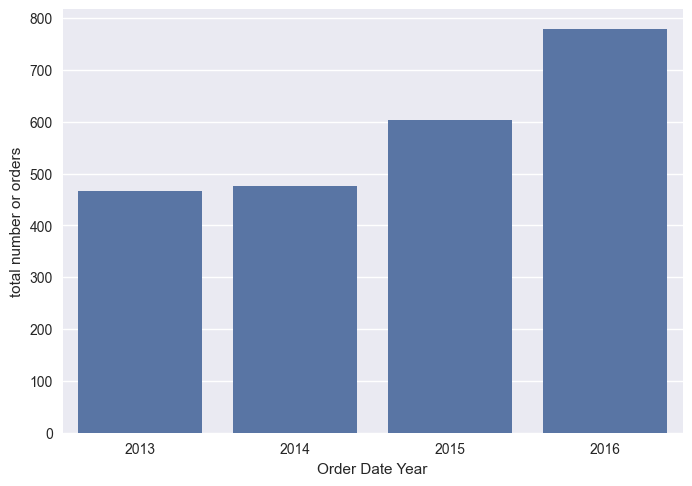

In [139]:
sns.countplot(data= df, x='Order Date Year')
plt.ylabel('total number or orders')

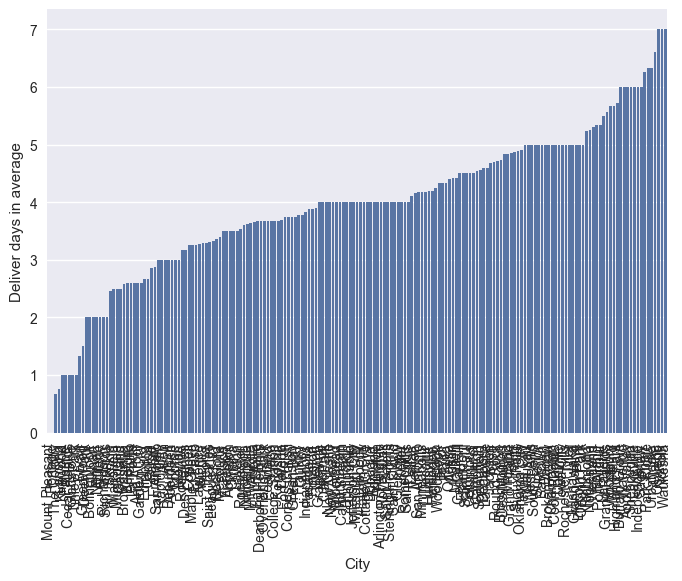

In [140]:
df_temp = df.groupby('City')['Delivery Days'].mean()
df_temp.sort_values(inplace=True)

sns.barplot(df_temp)
plt.xticks(rotation=90)
plt.ylabel('Deliver days in average')
plt.show()

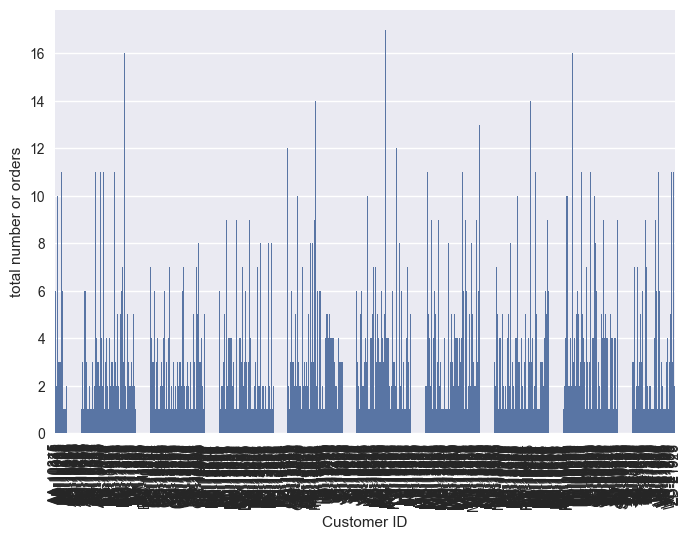

In [141]:
df_temp = df.groupby('Customer ID').size()

sns.barplot(x=df_temp.index, y=df_temp.values)
plt.ylabel('total number or orders')
plt.xticks(rotation=90)
plt.show()

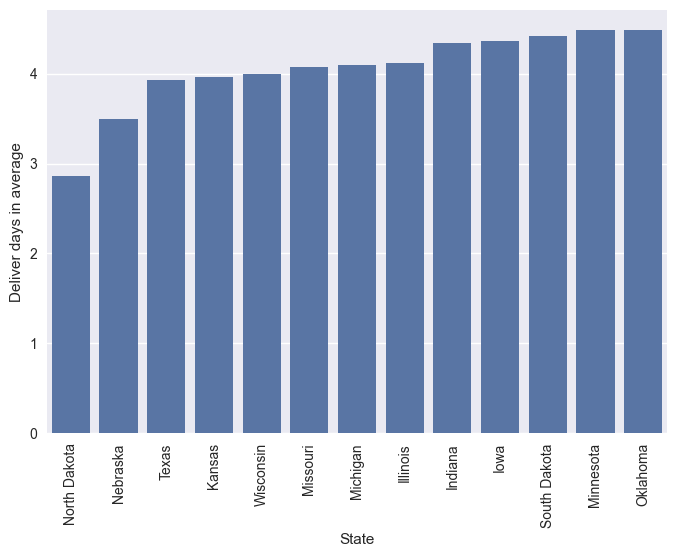

In [142]:
df_temp = df.groupby('State')['Delivery Days'].mean()
df_temp.sort_values(inplace=True)

sns.barplot(df_temp)
plt.xticks(rotation=90)
plt.ylabel('Deliver days in average')
plt.show()

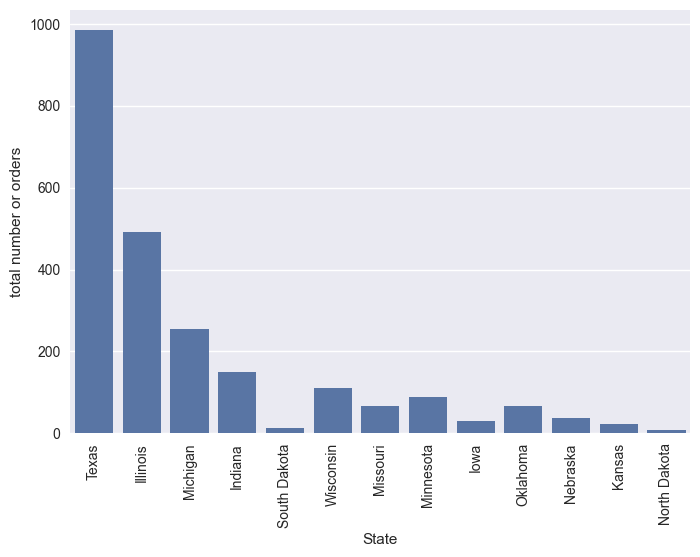

In [143]:
sns.countplot(data= df, x='State')
plt.ylabel('total number or orders')
plt.xticks(rotation=90)
plt.show()

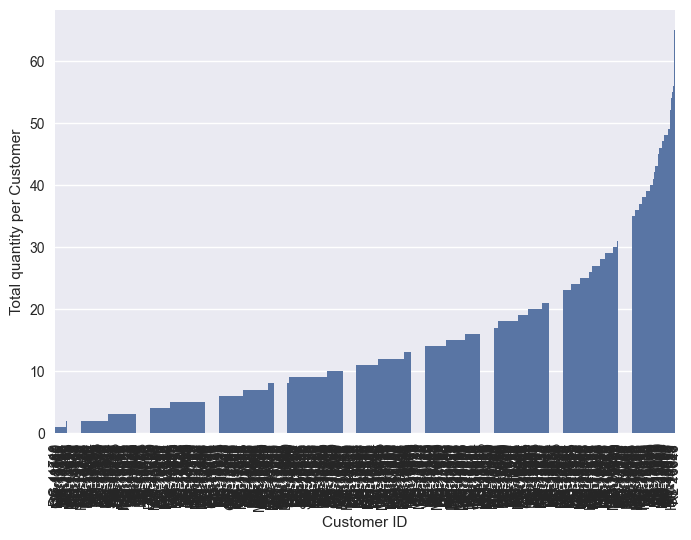

In [144]:
df_temp = df.groupby('Customer ID')['Quantity'].sum()
df_temp.sort_values(inplace=True)

sns.barplot(df_temp)
plt.xticks(rotation=90)
plt.ylabel('Total quantity per Customer')
plt.show()

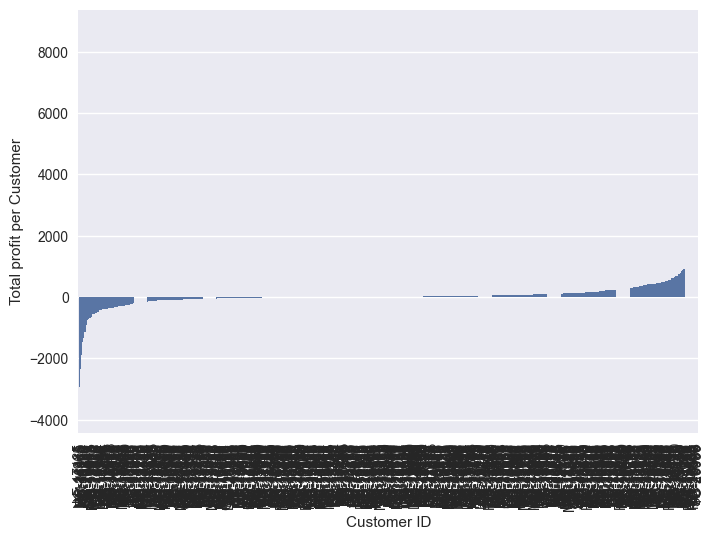

In [145]:
df_temp = df.groupby('Customer ID')['Profit'].sum()
df_temp.sort_values(inplace=True)

sns.barplot(df_temp)
plt.xticks(rotation=90)
plt.ylabel('Total profit per Customer')
plt.show()

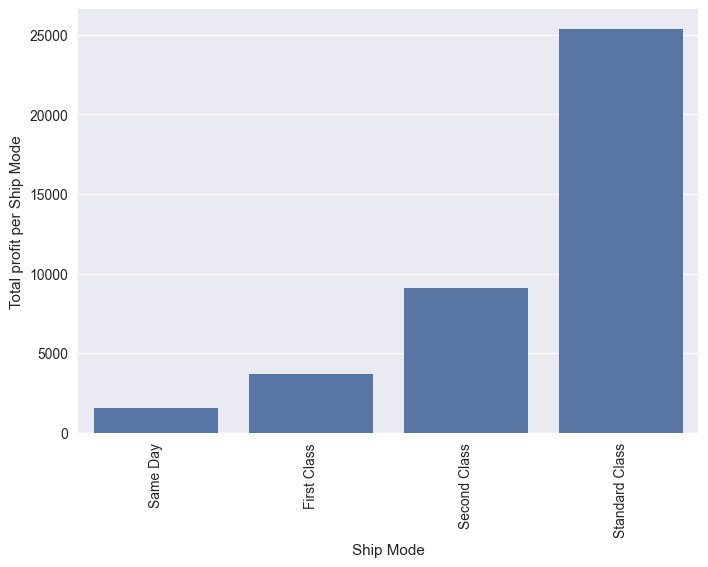

In [146]:
df_temp = df.groupby('Ship Mode')['Profit'].sum()
df_temp.sort_values(inplace=True)

sns.barplot(df_temp)
plt.xticks(rotation=90)
plt.ylabel('Total profit per Ship Mode')
plt.show()

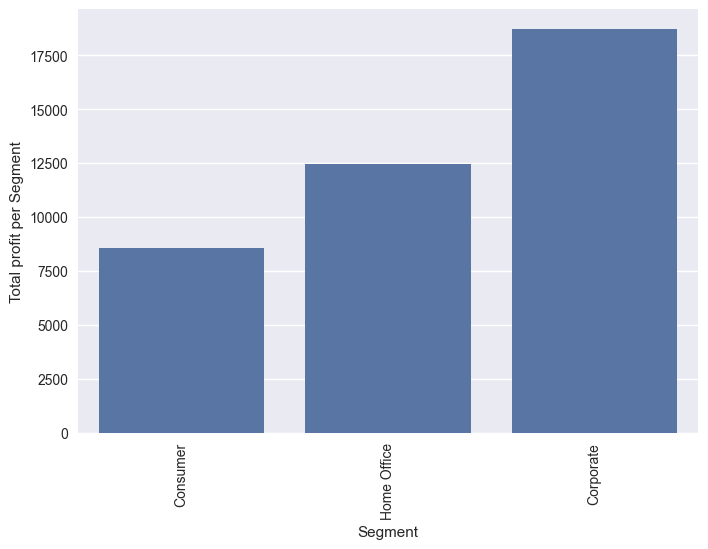

In [147]:
df_temp = df.groupby('Segment')['Profit'].sum()
df_temp.sort_values(inplace=True)

sns.barplot(df_temp)
plt.xticks(rotation=90)
plt.ylabel('Total profit per Segment')
plt.show()

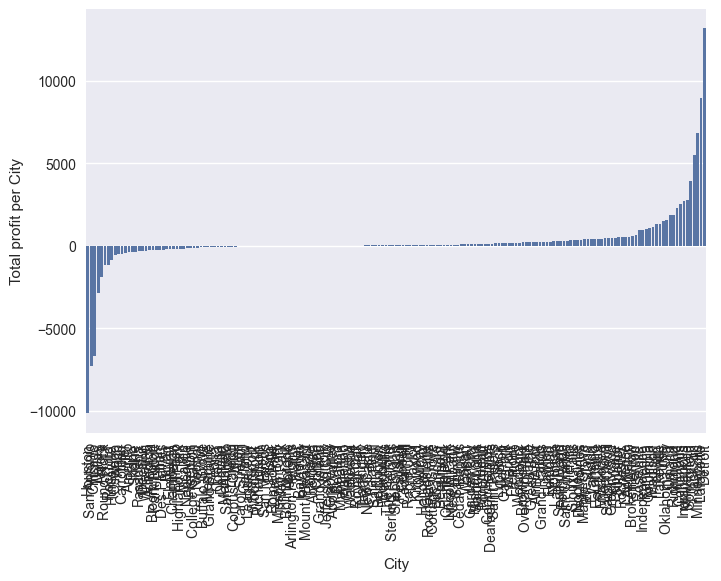

In [148]:
df_temp = df.groupby('City')['Profit'].sum()
df_temp.sort_values(inplace=True)

sns.barplot(df_temp)
plt.xticks(rotation=90)
plt.ylabel('Total profit per City')
plt.show()

c:\Users\yosef\anaconda3\envs\my-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


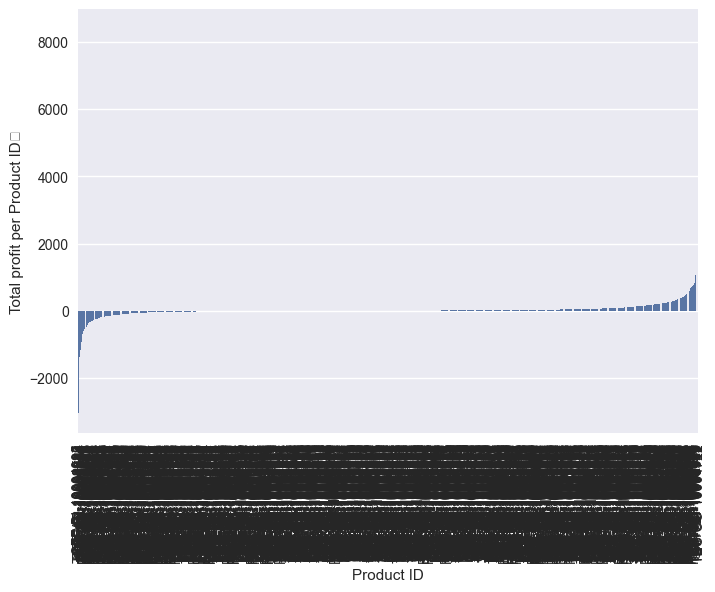

In [149]:
df_temp = df.groupby('Product ID')['Profit'].sum()
df_temp.sort_values(inplace=True)

sns.barplot(df_temp)
plt.xticks(rotation=90)
plt.ylabel('Total profit per Product ID	')
plt.show()

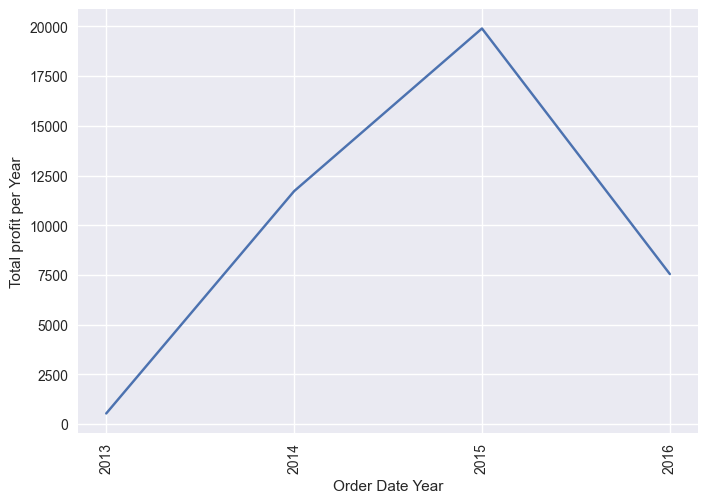

In [150]:
df_temp = df.groupby('Order Date Year')['Profit'].sum()
df_temp.sort_values(inplace=True)

sns.lineplot(x= df_temp.index, y=df_temp.values)
plt.xticks(rotation=90)
plt.xticks(plt.xticks()[0][1::2])
plt.ylabel('Total profit per Year')
plt.show()

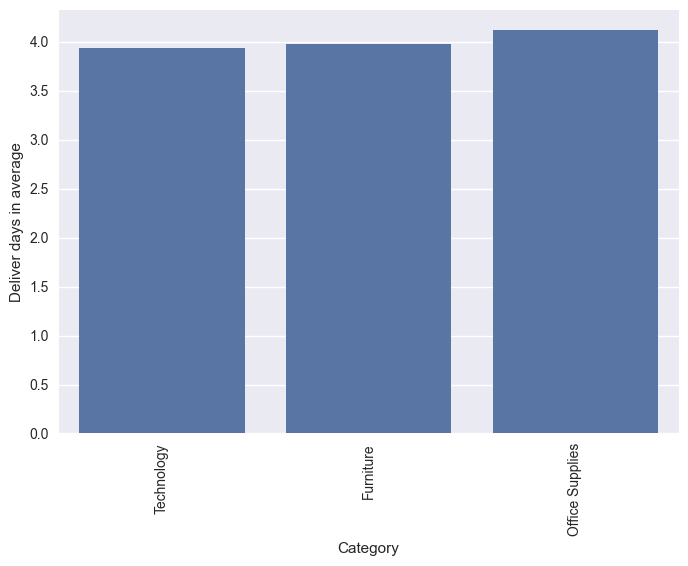

In [151]:
df_temp = df.groupby('Category')['Delivery Days'].mean()
df_temp.sort_values(inplace=True)

sns.barplot(df_temp)
plt.xticks(rotation=90)
plt.ylabel('Deliver days in average')
plt.show()